In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np

In [0]:
X_train = np.load("/content/drive/My Drive/Data/imgSeg/people/Xp_train.npy") / 255
y_train = np.load("/content/drive/My Drive/Data/imgSeg/people/yp_train.npy")
X_val = np.load("/content/drive/My Drive/Data/imgSeg/people/Xp_val.npy") / 255
y_val = np.load("/content/drive/My Drive/Data/imgSeg/people/yp_val.npy")

In [0]:
# optional
y_train = np.argmax(y_train, axis=3)
for i in range(len(y_train)):
    y_train[i][y_train[i]==0] = -1
y_train = y_train[:,:,:,np.newaxis]
y_val = np.argmax(y_val, axis=3)
for i in range(len(y_val)):
    y_val[i][y_val[i]==0] = -1
y_val = y_val[:,:,:,np.newaxis]

In [0]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Add, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization
from tensorflow.keras.layers import Activation

In [0]:
# VGG16
# model = Sequential([
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(128, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(256, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(512, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(1, 10, padding='same', activation='sigmoid'),
#     UpSampling2D(32, interpolation='bilinear'),
# ])

In [0]:
# ResNet
# im = Input(shape=(256, 256, 3))

# x = Conv2D(32, 3, padding='same', activation='relu')(im)
# cp1 = MaxPooling2D(2)(x)

# x = Conv2D(64, 3, padding='same', activation='relu')(cp1)
# cp2 = MaxPooling2D(2)(x)

# x = Conv2D(128, 3, padding='same', activation='relu')(cp2)
# cp3 = MaxPooling2D(2)(x)

# x = Conv2D(256, 3, padding='same', activation='relu')(cp3)
# cp4 = MaxPooling2D(2)(x)

# x = Conv2D(512, 3, padding='same', activation='relu')(cp4)
# cp5 = MaxPooling2D(2)(x)

# upcp3 = Conv2D(2, 1)(cp3)
# x = Conv2D(2, 1)(cp4)
# upcp4 = UpSampling2D(2, interpolation='bilinear')(x)
# x = Conv2D(2, 1)(cp5)
# upcp5 = UpSampling2D(4, interpolation='bilinear')(x)

# comb = Add()([upcp3, upcp4, upcp5])
# comb = Activation('softmax')(comb)
# out = UpSampling2D(8, interpolation='bilinear')(comb)

# model = Model(inputs=im, outputs=out)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Encoder-Decoder
# model = Sequential([
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(128, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(256, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(512, 3, padding='same', activation='relu'),
#     MaxPooling2D(2),
#     Conv2DTranspose(512, 3, padding='same', activation='relu'),
#     UpSampling2D(2, interpolation='bilinear'),
#     Conv2DTranspose(256, 3, padding='same', activation='relu'),
#     UpSampling2D(2, interpolation='bilinear'),
#     Conv2DTranspose(128, 3, padding='same', activation='relu'),
#     UpSampling2D(2, interpolation='bilinear'),
#     Conv2DTranspose(64, 3, padding='same', activation='relu'),
#     UpSampling2D(2, interpolation='bilinear'),
#     Conv2DTranspose(32, 3, padding='same', activation='relu'),
#     UpSampling2D(2, interpolation='bilinear'),
#     Conv2D(2, 1, padding='same', activation='softmax'),
# ])

In [0]:
# Unet
im = Input(shape=(256, 256, 3))

x = Conv2D(32, 3, padding='same', activation='relu')(im)
conv1 = MaxPooling2D(2)(x)

x = Conv2D(64, 3, padding='same', activation='relu')(conv1)
conv2 = MaxPooling2D(2)(x)

x = Conv2D(128, 3, padding='same', activation='relu')(conv2)
conv3 = MaxPooling2D(2)(x)

x = Conv2D(256, 3, padding='same', activation='relu')(conv3)
conv4 = MaxPooling2D(2)(x)

x = Conv2D(512, 3, padding='same', activation='relu')(conv4)
x = MaxPooling2D(2)(x)

x = BatchNormalization()(x)

x = Conv2D(512, 3, padding='same', activation='relu')(x)
x = Conv2DTranspose(256, 3, padding='same', activation='relu')(x)
x = UpSampling2D(2, interpolation='bilinear')(x)
x = Concatenate()([conv4, x])

x = Conv2D(256, 3, padding='same', activation='relu')(x)
x = Conv2DTranspose(128, 3, padding='same', activation='relu')(x)
x = UpSampling2D(2, interpolation='bilinear')(x)
x = Concatenate()([conv3, x])

x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = Conv2DTranspose(64, 3, padding='same', activation='relu')(x)
x = UpSampling2D(2, interpolation='bilinear')(x)
x = Concatenate()([conv2, x])

x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = Conv2DTranspose(32, 3, padding='same', activation='relu')(x)
x = UpSampling2D(2, interpolation='bilinear')(x)
x = Concatenate()([conv1, x])

x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = UpSampling2D(2, interpolation='bilinear')(x)
x = Conv2D(16, 3, padding='same', activation='relu')(x)
out = Conv2D(2, 1, padding='same', activation='softmax')(x)

model = Model(inputs=im, outputs=out)

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
model.fit(X_train, y_train, batch_size=50, epochs=20, validation_data=(X_val, y_val))
# model.fit(X_val, y_val, batch_size=50, epochs=20, validation_data=(X_train, y_train))

Train on 442 samples, validate on 446 samples
Epoch 1/20
442/442 [==============================] - 6s 14ms/sample - loss: 0.7219 - val_loss: 0.4783
Epoch 2/20
442/442 [==============================] - 4s 9ms/sample - loss: 0.4661 - val_loss: 0.4617
Epoch 3/20
442/442 [==============================] - 4s 9ms/sample - loss: 0.4475 - val_loss: 0.4539
Epoch 4/20
 50/442 [==>...........................] - ETA: 2s - loss: 0.4199

KeyboardInterrupt: ignored

In [0]:
import pylab

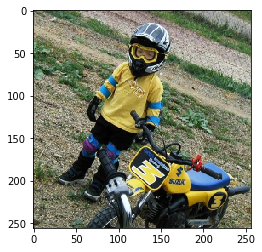

In [0]:
k = 8
pylab.imshow(X_train[k], cmap='gray')

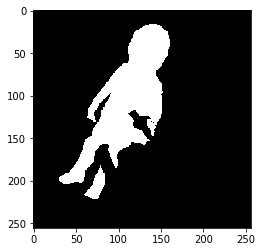

In [0]:
pylab.imshow(np.argmax(y_train[k], axis=2), cmap='gray')

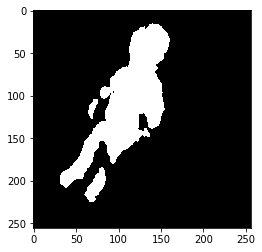

In [0]:
out = np.argmax(model.predict(X_train[k].reshape(1, 256, 256, 3)), axis=3)[0]
pylab.imshow(out, cmap='gray')

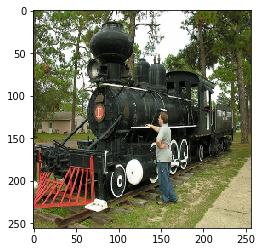

In [0]:
k = 29
pylab.imshow(X_val[k], cmap='gray')

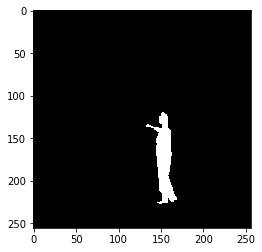

In [0]:
pylab.imshow(np.argmax(y_val[k], axis=2), cmap='gray')

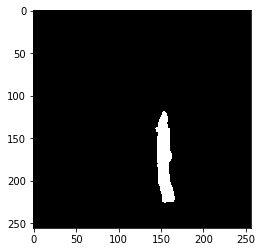

In [0]:
out = np.argmax(model.predict(X_val[k].reshape(1, 256, 256, 3)), axis=3)[0]
pylab.imshow(out, cmap='gray')

In [0]:
import cv2

In [0]:
img = cv2.imread("gzy.png")
img = img[:,:,::-1]

In [0]:
img = cv2.resize(img, (256, 256))

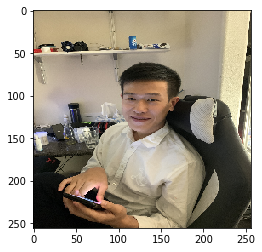

In [0]:
pylab.imshow(img)

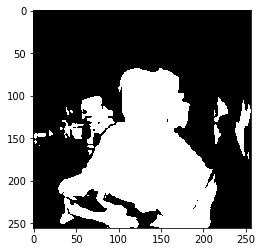

In [0]:
out = np.argmax(model.predict(img.reshape(1, 256, 256, 3)), axis=3)[0]
pylab.imshow(out, cmap='gray')